In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)

(60000, 28, 28)


In [0]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow( x_train[0])

In [0]:
# Using OpenCV
# import opencv and numpy
%matplotlib inline
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np

# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample #' + str(i)
    print(window_name)
    cv2_imshow(img)
    cv2.waitKey(0)

cv2.destroyAllWindows()     

Random Sample #0


Random Sample #1


Random Sample #2


Random Sample #3


Random Sample #4


Random Sample #5


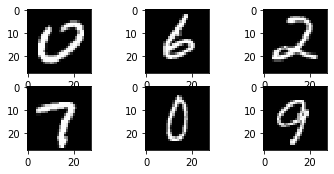

In [0]:
# importing matplot lib
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

In [0]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_train[1])

In [0]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD 

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776  

In [0]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 25s 411us/step - loss: 0.5772 - acc: 0.8201 - val_loss: 0.1902 - val_acc: 0.9443
Epoch 2/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.2893 - acc: 0.9132 - val_loss: 0.1339 - val_acc: 0.9593
Epoch 3/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.2177 - acc: 0.9344 - val_loss: 0.1054 - val_acc: 0.9671
Epoch 4/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1748 - acc: 0.9481 - val_loss: 0.0816 - val_acc: 0.9739
Epoch 5/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.1442 - acc: 0.9569 - val_loss: 0.0699 - val_acc: 0.9782
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.1242 - acc: 0.9624 - val_loss: 0.0622 - val_acc: 0.9791
Epoch 7/10
600

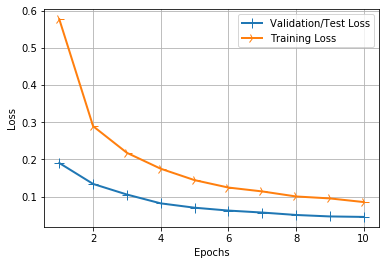

In [0]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

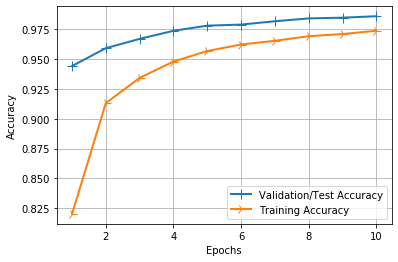

In [0]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [0]:
import warnings
warnings.filterwarnings("ignore")
model.save("/content/gdrive/My Drive/Sysytem Design and project/8_mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


In [0]:
from keras.models import load_model

classifier = load_model('/content/gdrive/My Drive/Sysytem Design and project/8_mnist_simple_cnn_10_Epochs.h5')

0 :No. Prediction


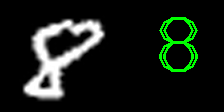

1 :No. Prediction


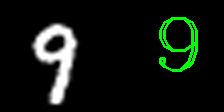

2 :No. Prediction


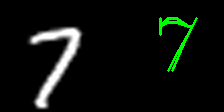

3 :No. Prediction


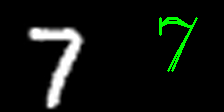

4 :No. Prediction


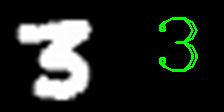

5 :No. Prediction


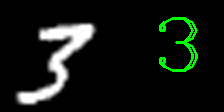

6 :No. Prediction


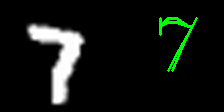

7 :No. Prediction


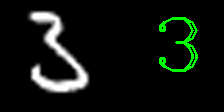

8 :No. Prediction


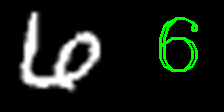

9 :No. Prediction


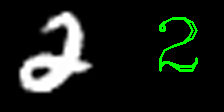

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    print(i,":No. Prediction")
    draw_test("Prediction", res, imageL)

In [0]:
print(x_train[0].shape[0])
print(x_train[0].shape[1])
print(y_test.shape)

28
28
(10000,)


In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import backend as K
from keras.optimizers import SGD

#Training Parameters
batch_size = 128
epochs = 10

#Load the mnist dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#Store rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

# store the shape of a single image 
input_shape = (img_rows,img_cols,1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /=255
x_test /=255

print('x_train shape:',x_train.shape)
print('Train samples',x_train.shape[0])
print('Test samples',x_test.shape[0])
y_test = y_test.reshape(y_test.shape[0],1) #Not important to do so
print("Y test before categorical",y_test.shape)

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print("Y test after categorical",y_test.shape)

# Let's count the number columns in our hot encoded matrix 
print('Number of classes:',y_test.shape[1])

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

# create model
model = Sequential()

model.add(Conv2D(32,
                 (3,3),
                 activation = 'relu',
                 input_shape = input_shape))
model.add(Conv2D(
    64,
    (3,3),
    activation = 'relu'
))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(0.01),
    metrics = ['accuracy']
)
print(model.summary())

history = model.fit(x_train,y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test,y_test))
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test loss',score[0])
print('Test Accuracy',score[1])

x_train shape: (60000, 28, 28, 1)
Train samples 60000
Test samples 10000
Y test before categorical (10000, 1)
Y test after categorical (10000, 10)
Number of classes: 10
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)  

0 :No. Prediction


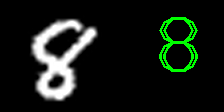

1 :No. Prediction


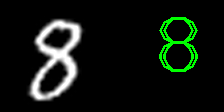

2 :No. Prediction


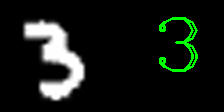

3 :No. Prediction


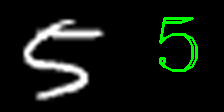

4 :No. Prediction


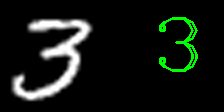

5 :No. Prediction


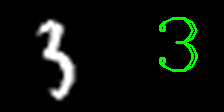

6 :No. Prediction


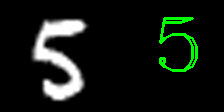

7 :No. Prediction


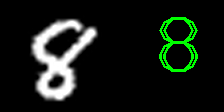

8 :No. Prediction


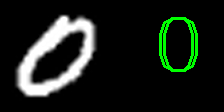

9 :No. Prediction


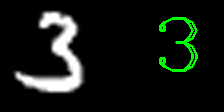

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    print(i,":No. Prediction")
    draw_test("Prediction", res, imageL)